C:\Users\dione\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\dione\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


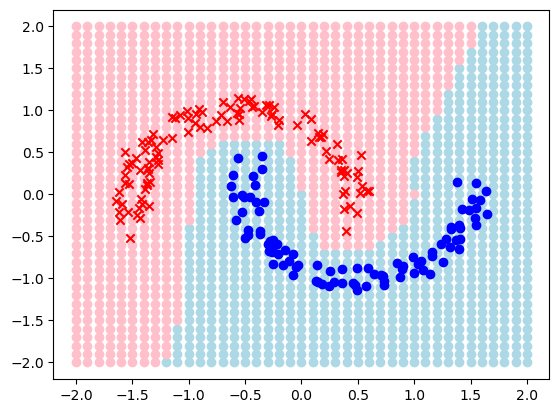

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score

# question 1.5

'''threshold = [0.1, 0.3, 0.55, 0.85,1.0]
TPR = [6/6, 6/6, 4/6, 2/6, 0/6]
FPR = [4/4, 2/4, 1/4,  0/4, 0/4]

plt.plot(FPR, TPR, marker='o')

for i, t in enumerate(threshold):
    plt.text(FPR[i] + 0.01, TPR[i] + 0.01, t)

plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC curve')
plt.show()
plt.clf()
plt.close()
'''

# question 2.1
D2z = pd.read_csv('data/D2z.txt', delimiter=' ', header=None)
D2z.columns = ['x1', 'x2', 'y']

model_D2z = KNeighborsClassifier(n_neighbors=1).fit(D2z[['x1', 'x2']], D2z['y'])
x1_test, x2_test = np.meshgrid(np.arange(-2, 2.1, step=0.1), np.arange(-2, 2.1, step=0.1))
xtest = np.array([x1_test.ravel(), x2_test.ravel()]).transpose()
ytest = model_D2z.predict(xtest)

D2z_test = pd.DataFrame(xtest)
D2z_test.columns=['x1', 'x2']
D2z_test['y'] = ytest

plt.scatter(D2z_test[D2z_test['y'] == 0]['x1'], D2z_test[D2z_test['y'] == 0]['x2'], color='lightblue')
plt.scatter(D2z_test[D2z_test['y'] == 1]['x1'], D2z_test[D2z_test['y'] == 1]['x2'], color='pink')
plt.scatter(D2z[D2z['y'] == 0]['x1'], D2z[D2z['y'] == 0]['x2'], color='blue', marker='o')
plt.scatter(D2z[D2z['y'] == 1]['x1'], D2z[D2z['y'] == 1]['x2'], color='red', marker='x')
plt.show()
plt.clf()
plt.close()




C:\Users\dione\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dione\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\dione\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dione\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

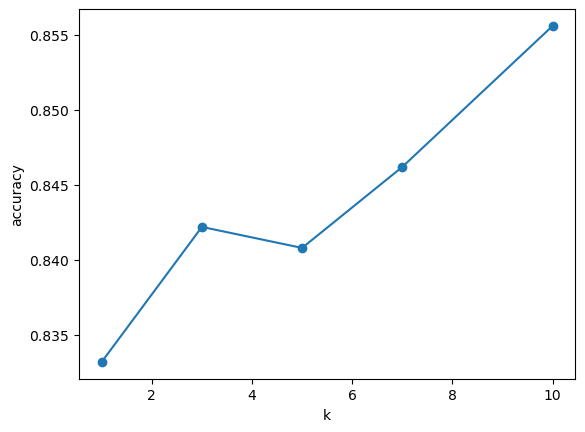

C:\Users\dione\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


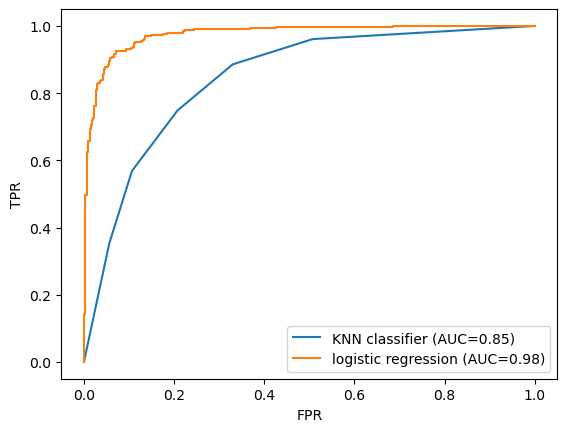

done


In [15]:
# question 2.2
emails = pd.read_csv('data/emails.csv')
emails = emails.drop(columns=['Email No.'])
one_nn_crossval_results = {
    'fold':[],
    'accuracy':[],
    'precision':[],
    'recall':[]
}
logistic_crossval_results = {
    'fold':[],
    'accuracy':[],
    'precision':[],
    'recall':[]
}
num_folds=5



knn_crossval_results = {
    'k':[],
    'fold':[],
    'accuracy':[],
    'precision':[],
    'recall':[]
}

for k in [1, 3, 5, 7, 10]:
    for f in range(0, num_folds):
        test_idx = [f * 1000, f * 1000 + 1000]

        test_emails = emails.iloc[test_idx[0]:test_idx[1], :]
        X_test = test_emails.iloc[:, :-1]
        y_test = test_emails.iloc[:, -1]

        train_emails = emails.drop(test_emails.index)
        X_train = train_emails.iloc[:, :-1]
        y_train = train_emails.iloc[:, -1]

        knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        preds_knn = knn_model.predict(X_test)

        knn_crossval_results['k'].append(k)
        knn_crossval_results['fold'].append(f + 1)
        knn_crossval_results['accuracy'].append(accuracy_score(y_test, preds_knn))
        knn_crossval_results['precision'].append(precision_score(y_test, preds_knn))
        knn_crossval_results['recall'].append(recall_score(y_test, preds_knn))


knn_crossval_results_all = pd.DataFrame(knn_crossval_results)
knn_crossval_results = knn_crossval_results_all.drop(columns=['fold']).groupby(['k']).mean().reset_index()
plt.plot(knn_crossval_results['k'], knn_crossval_results['accuracy'], marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
plt.clf()
plt.close()

test_idx = [4000, 5000]

test_emails = emails.iloc[test_idx[0]:test_idx[1], :]
X_test = test_emails.iloc[:, :-1]
y_test = test_emails.iloc[:, -1]

train_emails = emails.drop(test_emails.index)
X_train = train_emails.iloc[:, :-1]
y_train = train_emails.iloc[:, -1]

knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_scores_knn = knn_model.predict_proba(X_test)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_scores_knn[:, 1])
auc_knn = roc_auc_score(y_test, y_scores_knn[:, 1])

logistic_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_scores_logistic = logistic_model.predict_proba(X_test)
fpr_log, tpr_log, threshold_log = roc_curve(y_test, y_scores_logistic[:, 1])
auc_log = roc_auc_score(y_test, y_scores_logistic[:, 1])

plt.plot(fpr_knn, tpr_knn, label='KNN classifier (AUC='+str(np.round(auc_knn, 2))+')')
plt.plot(fpr_log, tpr_log, label='logistic regression (AUC='+str(np.round(auc_log, 2))+')')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

print('done')